In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

1.  Opis problemu, skąd pomysł, źródło danych
2. Wstępną analizę danych (histogramy, scatterploty, macierz korelacji między zmiennymi mierzonymi na skali ilorazowej, podstawowe statystyki opisowe: średnia, mediana, kwartyle, minimum, maksimum, współczynnik zmienności dla każdej zmiennej). Do wszystkiego ma być dorzucona interpretacja.
3.      3. Faktyczną analizę
a.       W przypadku projektu z analizy skupień (ćwiczenia 1): Grupowanie metodą k-średnich (dla różnych wartości k), wraz z oceną jakości dopasowania dostępnymi metrykami (Silhouette, Caliński-Harabasz, wewnątrzgrupowa suma kwadratów). Na podstawie analizy wybrać odpowiednie k, i zwizualizować grupowanie dla 3 wybranych zmiennych (jeśli jest ich więcej). Centra klastrów zinterpretować (‘przeciętni przedstawiciele klastra’). Przeprowadzić również analizę skupień za pomocą metody aglomeracyjnej z użyciem różnych metod łączenia klastrów (np: ‘single’, ‘average’, ‘ward’, ‘median’), dokonać porównania, przedstawić dendrogramy wraz z opisem i decyzją ile klastrów powinno zostać wykorzystanych. Dodatkowo (dla chętnych): dorzucić dodatkowy algorytm klastrowania, np. DBScan, K-Medoids, MeanShift.

In [2]:
data = pd.read_csv('top2018.csv')

In [15]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [13]:
data = data.drop(columns=['id','name','artists'])

In [14]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


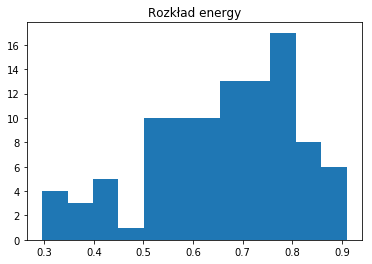

In [11]:
data['energy'].hist(bins=12)
plt.title('Rozkład energy')
plt.grid(None)
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data)

In [17]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.287854,-1.455314,0.456531,-1.997753,0.833616,-0.063162,-0.739184,-0.112147,3.543567,-0.621334,-1.491544,-0.156599,0.100504
1,0.180503,-0.319108,0.729903,0.450984,0.833616,0.282982,0.283383,0.159656,-0.317744,-0.055789,-1.566444,-0.969690,0.100504
2,-0.992691,-0.859498,-0.090213,-0.233147,-1.199593,-0.247772,-0.357995,-0.113440,-0.245738,-1.679294,1.394085,0.325071,0.100504
3,0.172835,-0.693224,0.729903,-1.319276,0.833616,0.013759,1.748092,-0.118343,-0.416751,-0.221552,0.705712,0.407795,0.100504
4,0.908957,-0.229043,-1.183701,-0.087840,0.833616,0.090680,-0.622280,-0.113859,2.139454,-0.655462,-1.007767,0.319494,0.100504


In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [20]:
kmeans.cluster_centers_

array([[ 0.14883753,  0.61297655,  0.06166058,  0.60022781, -0.33359692,
        -0.04836503, -0.25457352, -0.10972355, -0.00491839,  0.60509696,
        -0.04311609,  0.03543868,  0.19356284],
       [-0.1596124 , -0.76065769, -0.0416133 , -0.73088576,  0.38179151,
         0.07337284,  0.32459225, -0.08823332,  0.00816266, -0.70483333,
         0.0144385 , -0.03244465, -0.23450882],
       [-0.85466845,  1.12886239, -1.45707297,  0.47755747,  0.83361577,
        -0.69006625, -0.85968084,  9.89557074, -0.10172617, -0.957736  ,
         1.67853626, -0.45367952,  0.10050378]])

In [21]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[     0.73587037,      0.74753704,      5.55555556,
            -4.61603704,      0.42592593,      0.11053889,
             0.13973615,      0.00011533,      0.15775556,
             0.60855556,    118.66883333, 206617.5       ,
             4.01851852],
       [     0.69564444,      0.54926667,      5.17777778,
            -6.97033333,      0.77777778,      0.1232    ,
             0.26705933,      0.0004029 ,      0.15920889,
             0.33987333,    120.31786667, 203915.24444444,
             3.93333333],
       [     0.605     ,      0.822     ,      0.        ,
            -4.833     ,      1.        ,      0.0438    ,
             0.00671   ,      0.134     ,      0.147     ,
             0.288     ,    167.997     , 187147.        ,
             4.        ]])

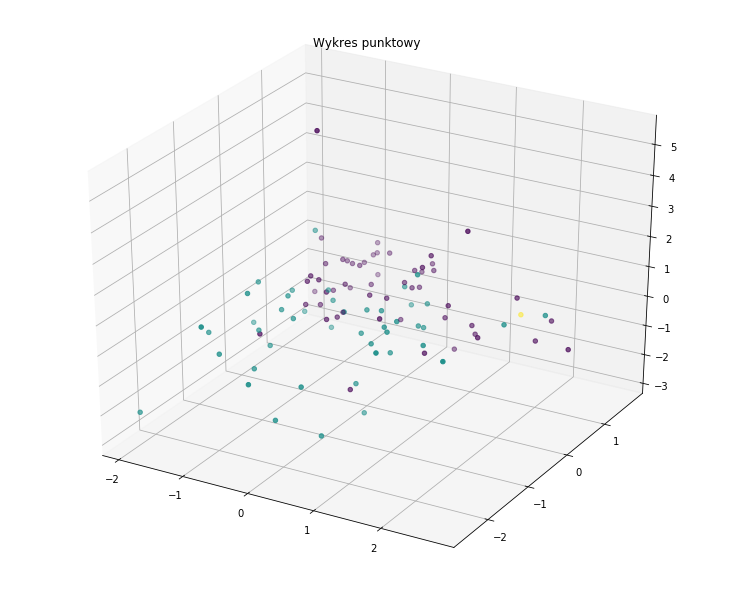

In [23]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(
    data['tempo'],
    data['energy'],
    data['duration_ms'],
    c=kmeans.labels_
)
plt.title('Wykres punktowy')
plt.show()